<a href="https://colab.research.google.com/github/pughlab/hbc/blob/main/hbc_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = '/content/drive/My Drive/Pughlab-Work/all_inset_size.tsv'
df = pd.read_csv(file_path, sep = '\t')


In [ ]:
df

,Sample,MEAN_INSERT_SIZE,STANDARD_DEVIATION,READ_PAIRS,Total.Fragments,Total.Short,Total.Normal,Total.Long,Proportion.Short,Proportion.Long,Ratio.Short.Normal
0,HCC0,176.403588,55.191854,367363212,366370758,70695425,265681763,29993570,0.192961,0.081867,0.266091
1,HCC0,189.990567,64.815649,365052987,363533234,45023467,272970511,45539256,0.123850,0.125268,0.164939
2,HCC0,179.249647,59.207717,407722484,406554008,79320040,288965135,38268833,0.195103,0.094130,0.274497
3,HCC0,183.331093,58.415381,425690288,424468713,61384105,321297620,41786988,0.144614,0.098445,0.191051
4,HCC0,186.953445,63.117066,409889104,408308840,57216812,304281974,46810054,0.140131,0.114644,0.188039
...,...,...,...,...,...,...,...,...,...,...,...
409,TGL49,174.878150,50.363804,22469828,22427881,4428853,16377024,1622004,0.197471,0.072321,0.270431
410,TGL49,180.623053,52.971600,22544202,22486813,3208319,17432514,1845980,0.142676,0.082092,0.184042
411,TGL49,179.003788,59.985935,21771262,21699005,4369187,15250348,2079470,0.201354,0.095833,0.286498
412,TGL49,187.981948,65.374019,21409297,21325545,3244217,15461761,2619567,0.152128,0.122837,0.209822


In [ ]:
# prompt: print the first column in df

print(df.iloc[:, 0])


0       HCC0
1       HCC0
2       HCC0
3       HCC0
4       HCC0
       ...  
409    TGL49
410    TGL49
411    TGL49
412    TGL49
413    TGL49
Name: Sample, Length: 414, dtype: object


In [ ]:
# prompt: Run K-means clustering on df. Use all the columns in the clustering except for the first column.

from sklearn.cluster import KMeans

# Assuming df is already loaded as in the previous example

# Select all columns except the first one for clustering
X = df.iloc[:, 1:]

# Choose the number of clusters (k)
k = 3  # Replace with your desired number of clusters

# Initialize and fit the KMeans model
kmeans = KMeans(n_clusters=k, random_state=0) #random_state for reproducibility
kmeans.fit(X)

# Get cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels to the DataFrame
df['cluster'] = labels

# Print the DataFrame with cluster assignments
df


,Sample,MEAN_INSERT_SIZE,STANDARD_DEVIATION,READ_PAIRS,Total.Fragments,Total.Short,Total.Normal,Total.Long,Proportion.Short,Proportion.Long,Ratio.Short.Normal,Cluster,cluster
0,HCC0,176.403588,55.191854,367363212,366370758,70695425,265681763,29993570,0.192961,0.081867,0.266091,1,1
1,HCC0,189.990567,64.815649,365052987,363533234,45023467,272970511,45539256,0.123850,0.125268,0.164939,1,1
2,HCC0,179.249647,59.207717,407722484,406554008,79320040,288965135,38268833,0.195103,0.094130,0.274497,1,1
3,HCC0,183.331093,58.415381,425690288,424468713,61384105,321297620,41786988,0.144614,0.098445,0.191051,1,1
4,HCC0,186.953445,63.117066,409889104,408308840,57216812,304281974,46810054,0.140131,0.114644,0.188039,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,TGL49,174.878150,50.363804,22469828,22427881,4428853,16377024,1622004,0.197471,0.072321,0.270431,0,0
410,TGL49,180.623053,52.971600,22544202,22486813,3208319,17432514,1845980,0.142676,0.082092,0.184042,0,0
411,TGL49,179.003788,59.985935,21771262,21699005,4369187,15250348,2079470,0.201354,0.095833,0.286498,0,0
412,TGL49,187.981948,65.374019,21409297,21325545,3244217,15461761,2619567,0.152128,0.122837,0.209822,0,0


In [ ]:
# prompt: Plot the output of the above clustering.

import matplotlib.pyplot as plt

# Assuming df and labels are already defined from the previous code

# Choose two columns for plotting (replace with your desired columns)
x_col = 'MEAN_INSERT_SIZE'  # Replace with the name of the column you want to use for the x-axis
y_col = 'STANDARD_DEVIATION'  # Replace with the name of the column you want to use for the y-axis

if x_col not in df.columns or y_col not in df.columns:
  print(f"Error: '{x_col}' or '{y_col}' not found in the DataFrame.")
else:
  # Create the scatter plot
  plt.figure(figsize=(8, 6))  # Adjust figure size as needed
  for cluster_label in range(k):
      cluster_data = df[df['cluster'] == cluster_label]
      plt.scatter(cluster_data[x_col], cluster_data[y_col], label=f'Cluster {cluster_label}')

  # Customize the plot (optional)
  plt.xlabel(x_col)
  plt.ylabel(y_col)
  plt.title('KMeans Clustering Results')
  plt.legend()
  plt.grid(True)

  # Show the plot
  plt.show()

NameError: name 'k' is not defined

<Figure size 800x600 with 0 Axes>

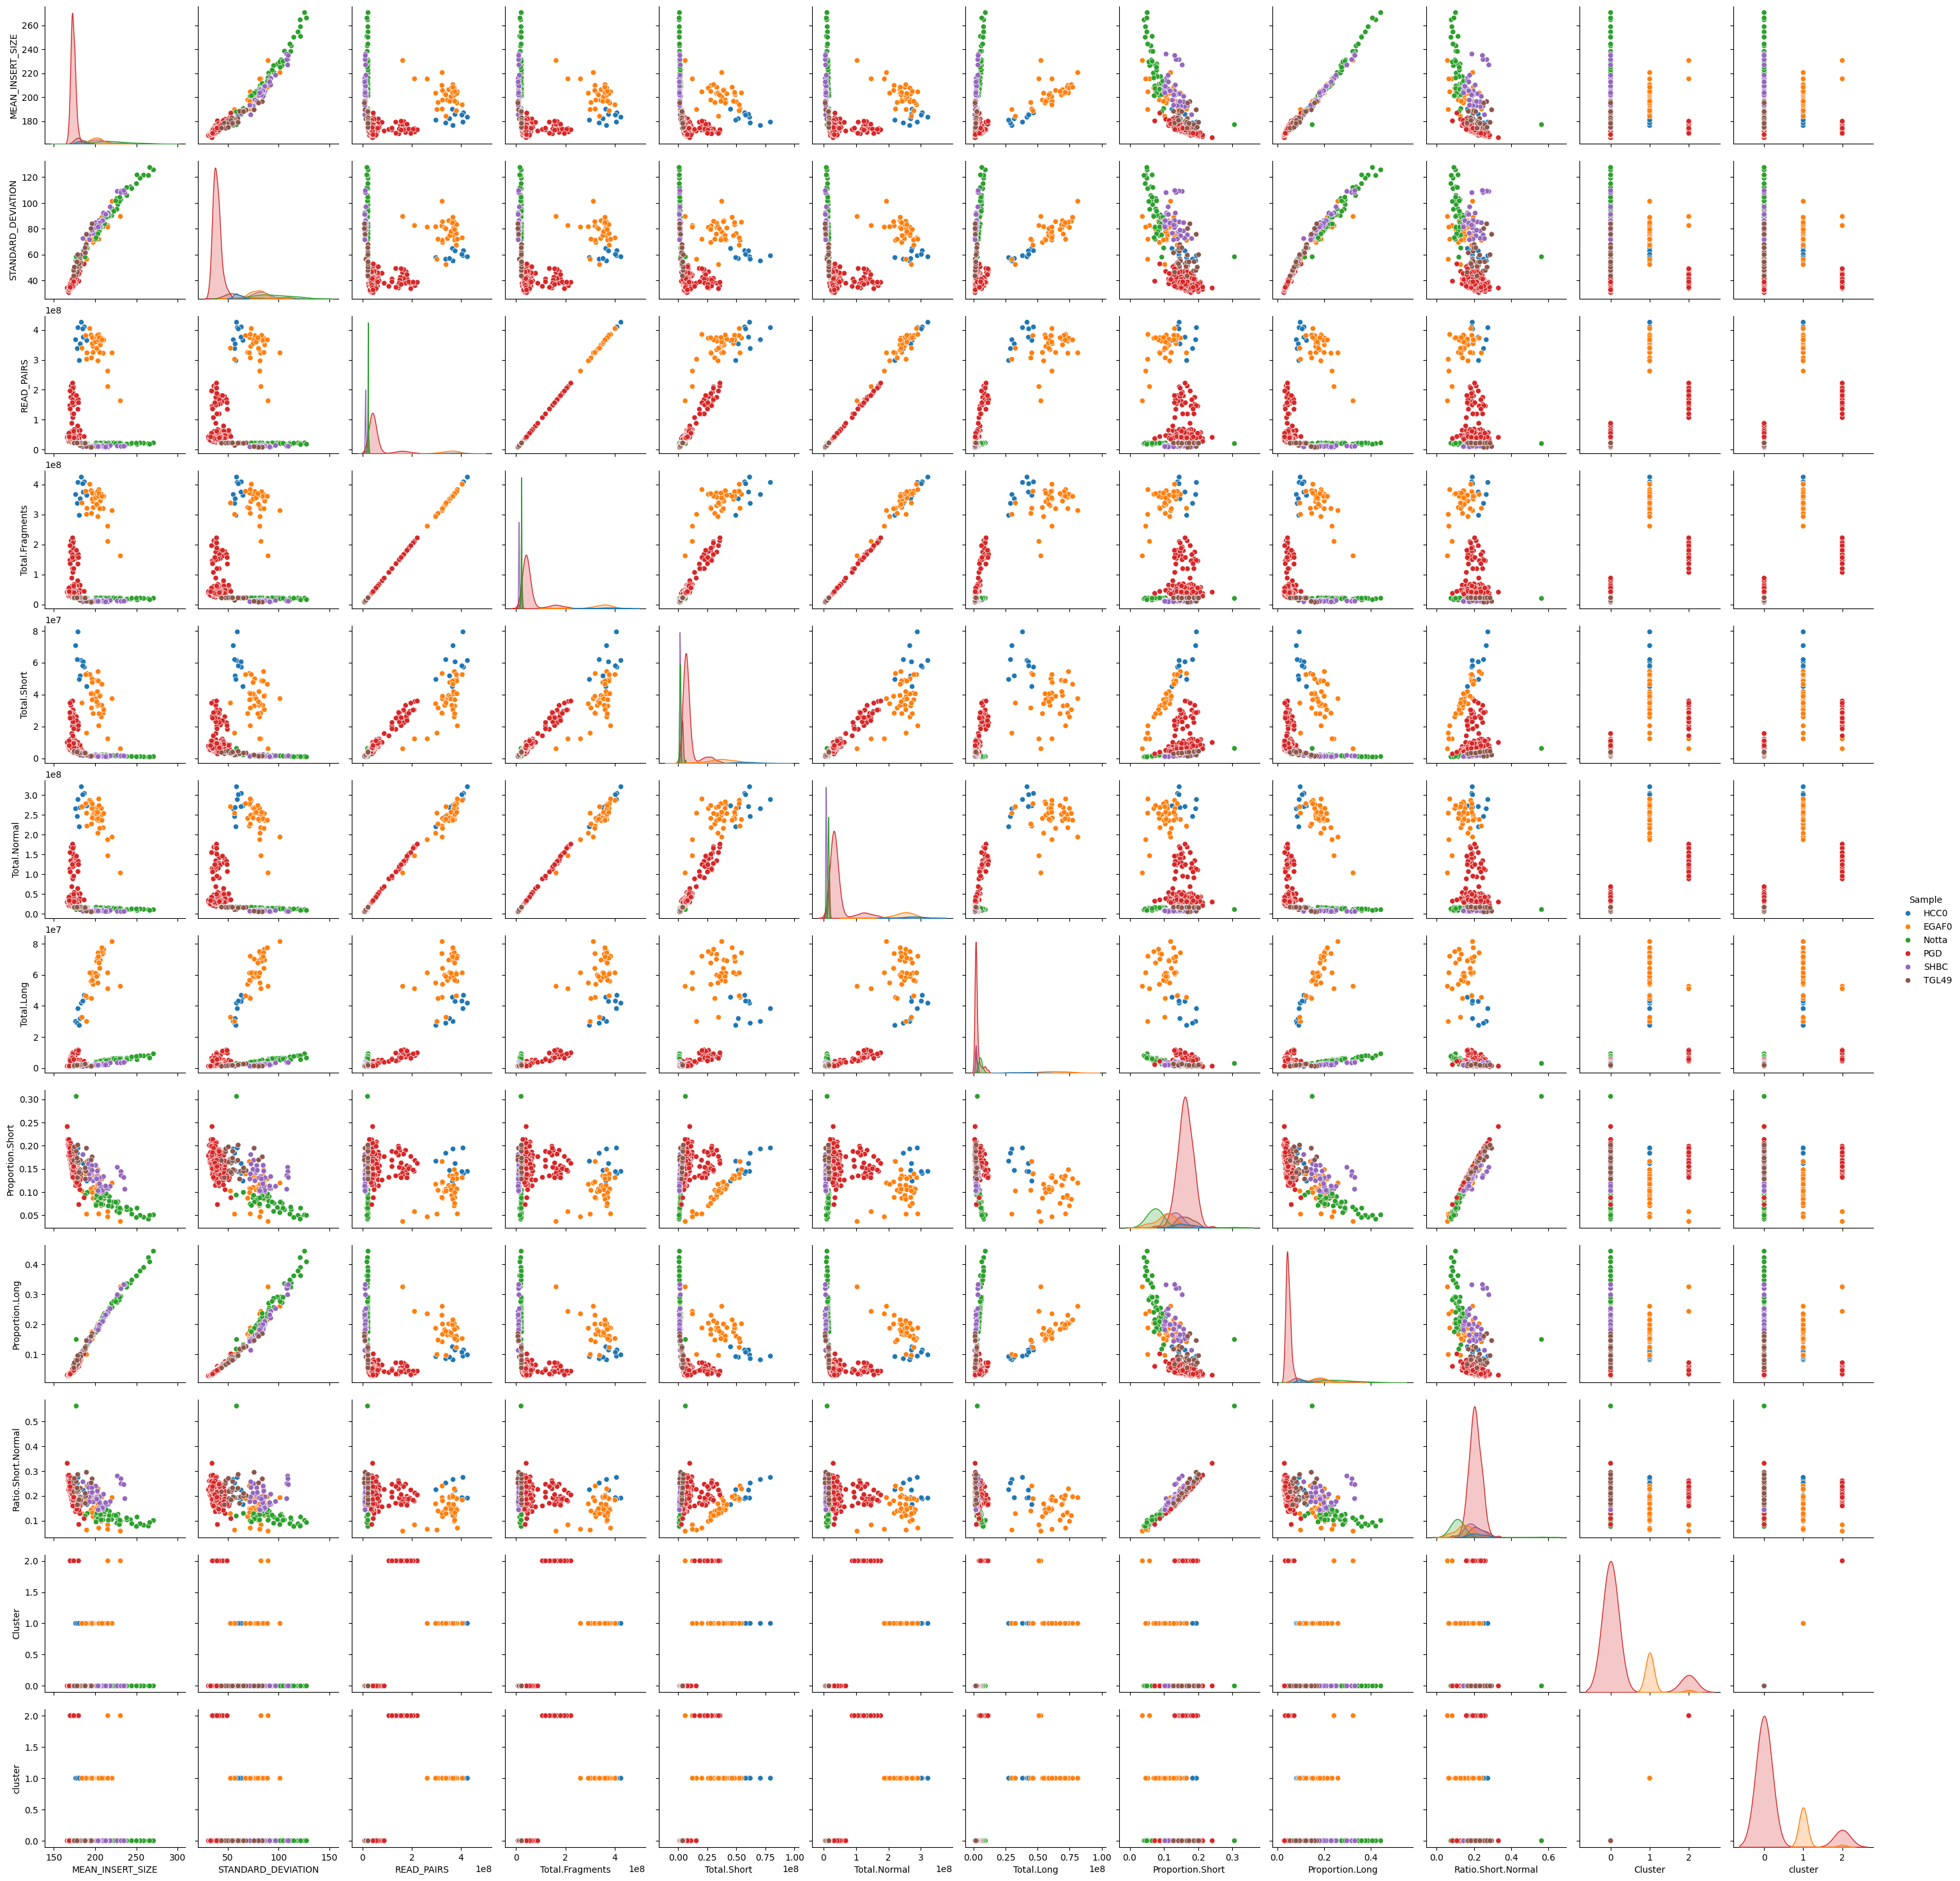

In [ ]:
# prompt: Plot df data for pairwise features other than Sample. Use the Sample column to color the points.

import seaborn as sns

# Assuming df is already loaded and processed as in the previous code

# Exclude the 'Sample' column
features_to_plot = [col for col in df.columns if col != 'Sample']

# Create the pairplot
sns.pairplot(df, vars=features_to_plot, hue='Sample')
plt.show()

In [ ]:
print(df)


    Sample  MEAN_INSERT_SIZE  STANDARD_DEVIATION  READ_PAIRS  Total.Fragments  \
0     HCC0        176.403588           55.191854   367363212        366370758   
1     HCC0        189.990567           64.815649   365052987        363533234   
2     HCC0        179.249647           59.207717   407722484        406554008   
3     HCC0        183.331093           58.415381   425690288        424468713   
4     HCC0        186.953445           63.117066   409889104        408308840   
..     ...               ...                 ...         ...              ...   
409  TGL49        174.878150           50.363804    22469828         22427881   
410  TGL49        180.623053           52.971600    22544202         22486813   
411  TGL49        179.003788           59.985935    21771262         21699005   
412  TGL49        187.981948           65.374019    21409297         21325545   
413  TGL49        178.203907           54.429874    22316146         22259027   

     Total.Short  Total.Nor

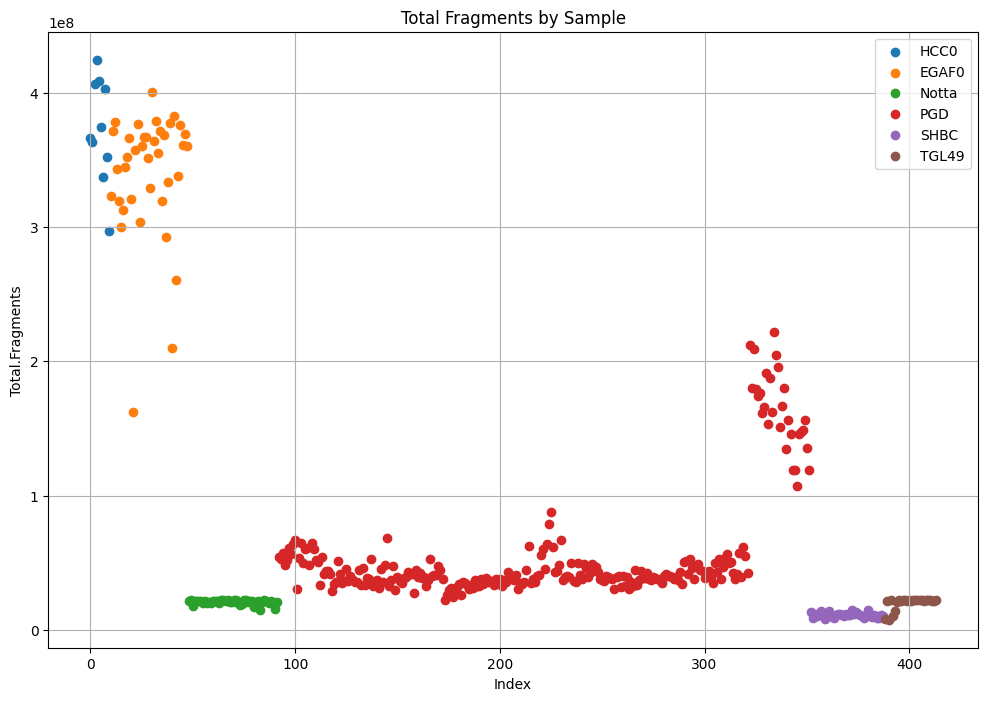

In [ ]:
# prompt: Use df and plot all features agains "Total.Fragments". Color the points based on the Sample column.

import matplotlib.pyplot as plt

# Assuming 'Total.Fragments' and 'Sample' are columns in your DataFrame

if 'Total.Fragments' not in df.columns or 'Sample' not in df.columns:
    print("Error: 'Total.Fragments' or 'Sample' column not found in the DataFrame.")
else:
    # Create the plot
    plt.figure(figsize=(12, 8))  # Adjust figure size if needed

    for sample in df['Sample'].unique():
        sample_data = df[df['Sample'] == sample]
        plt.scatter(sample_data.index, sample_data['Total.Fragments'], label=sample)  # Plot against index

    plt.xlabel("Index") # Replace index with a relevant x-axis label if available
    plt.ylabel("Total.Fragments")
    plt.title("Total Fragments by Sample")
    plt.legend()
    plt.grid(True)
    plt.show()

<Figure size 1500x1000 with 0 Axes>

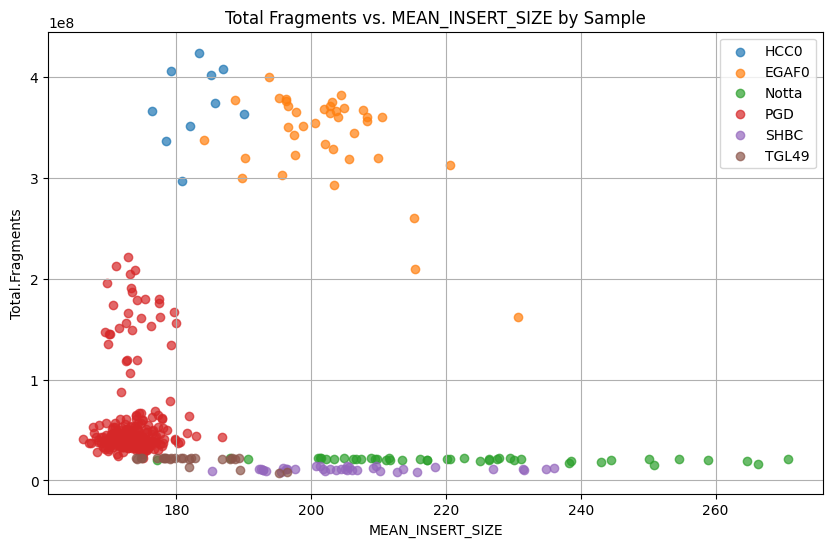

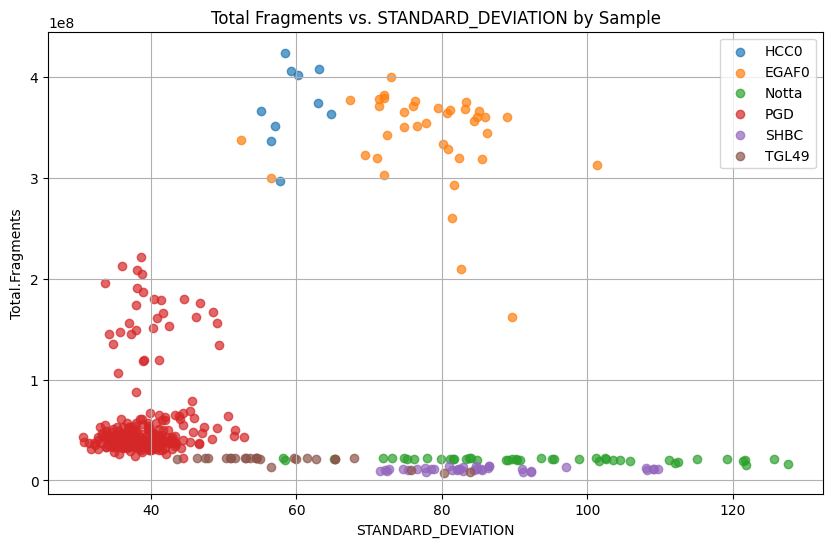

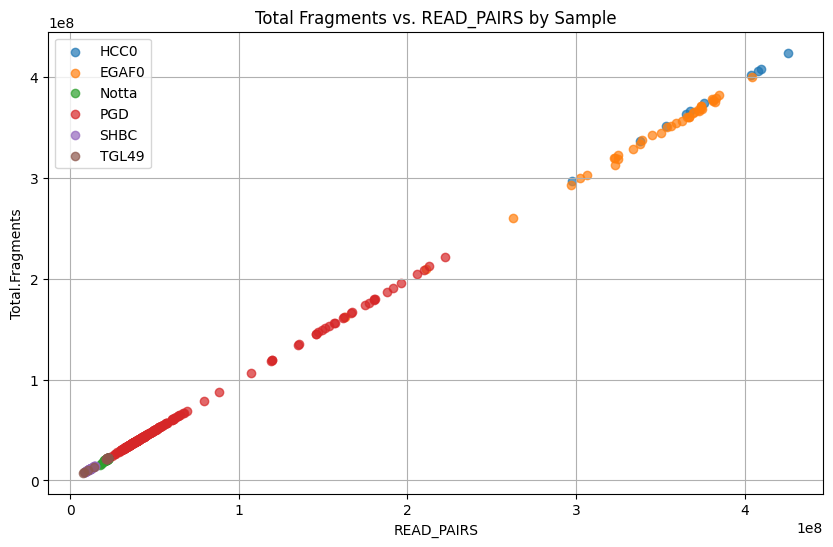

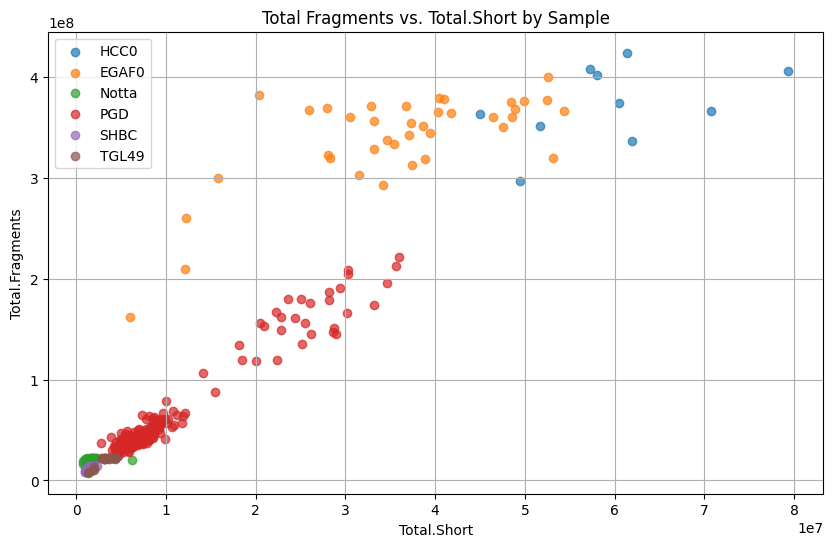

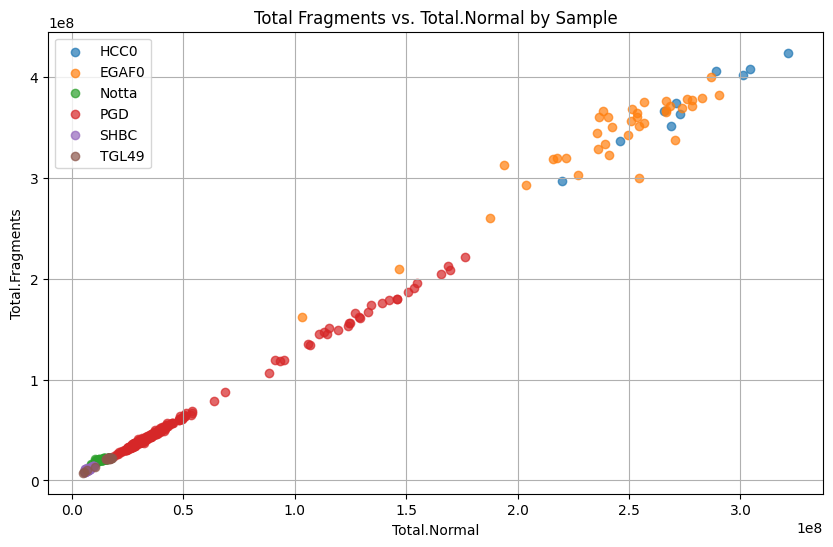

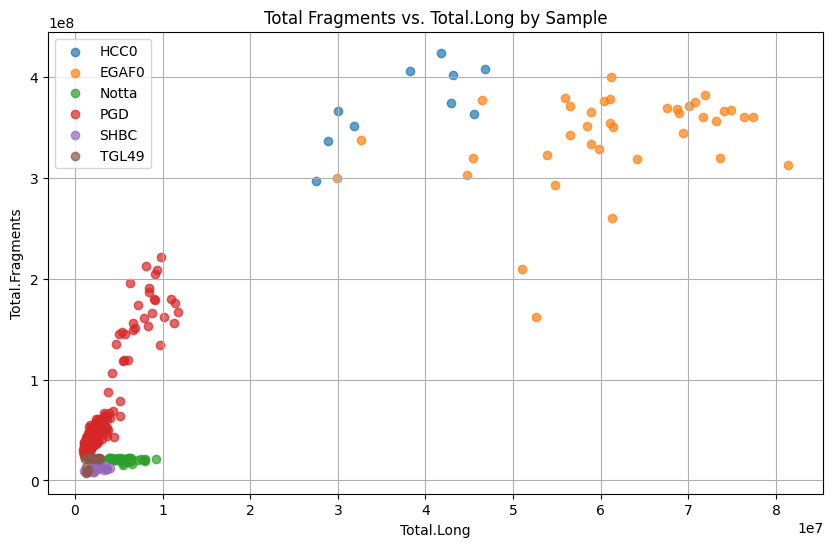

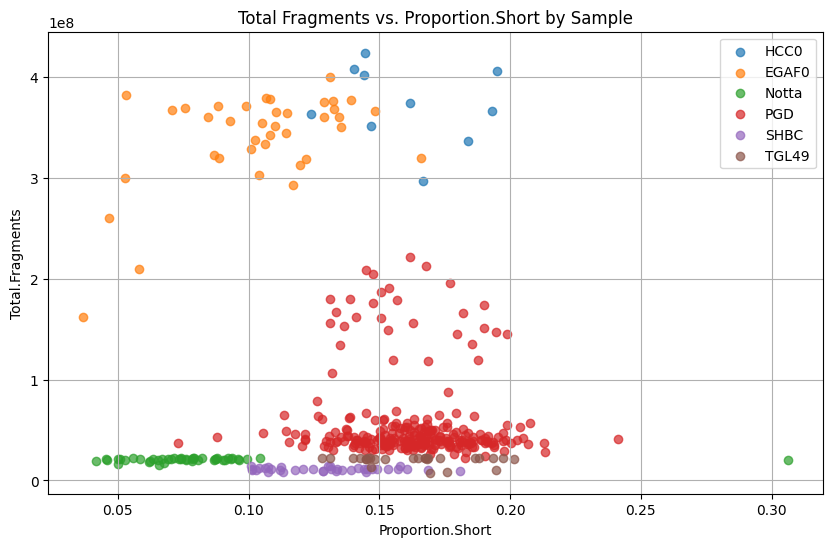

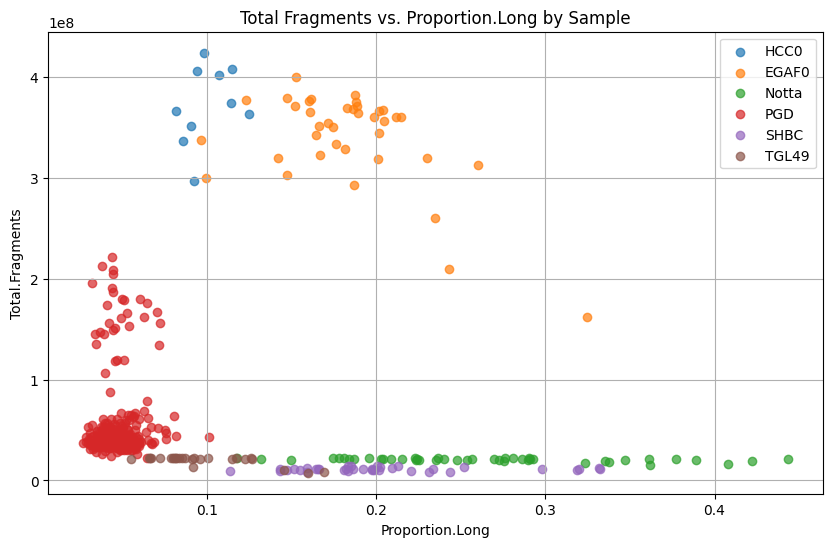

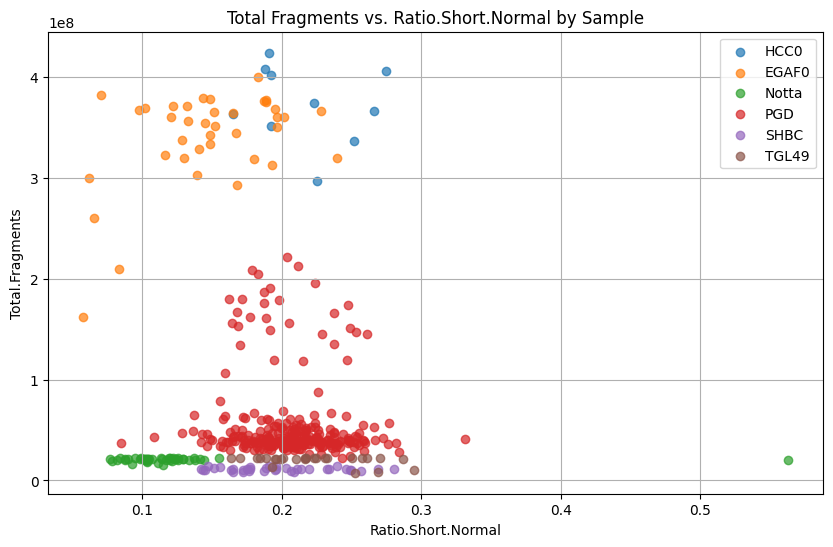

In [ ]:
# prompt: Plot all features with respect to "Total.Fragments" and color the points based on which Sample they come from.

# Assuming 'Total.Fragments' and 'Sample' are columns in your DataFrame and other features exist

if 'Total.Fragments' not in df.columns or 'Sample' not in df.columns:
    print("Error: 'Total.Fragments' or 'Sample' column not found in the DataFrame.")
else:
    # Select features to plot (exclude 'Total.Fragments' and 'Sample')
    features = [col for col in df.columns if col not in ['Total.Fragments', 'Sample']]

    # Create the plot
    plt.figure(figsize=(15, 10))  # Adjust figure size as needed

    for feature in features:
        plt.figure(figsize=(10,6)) # individual figure sizes
        for sample in df['Sample'].unique():
            sample_data = df[df['Sample'] == sample]
            plt.scatter(sample_data[feature], sample_data['Total.Fragments'], label=sample, alpha=0.7)
        plt.xlabel(feature)
        plt.ylabel("Total.Fragments")
        plt.title(f"Total Fragments vs. {feature} by Sample")
        plt.legend()
        plt.grid(True)
        plt.show()